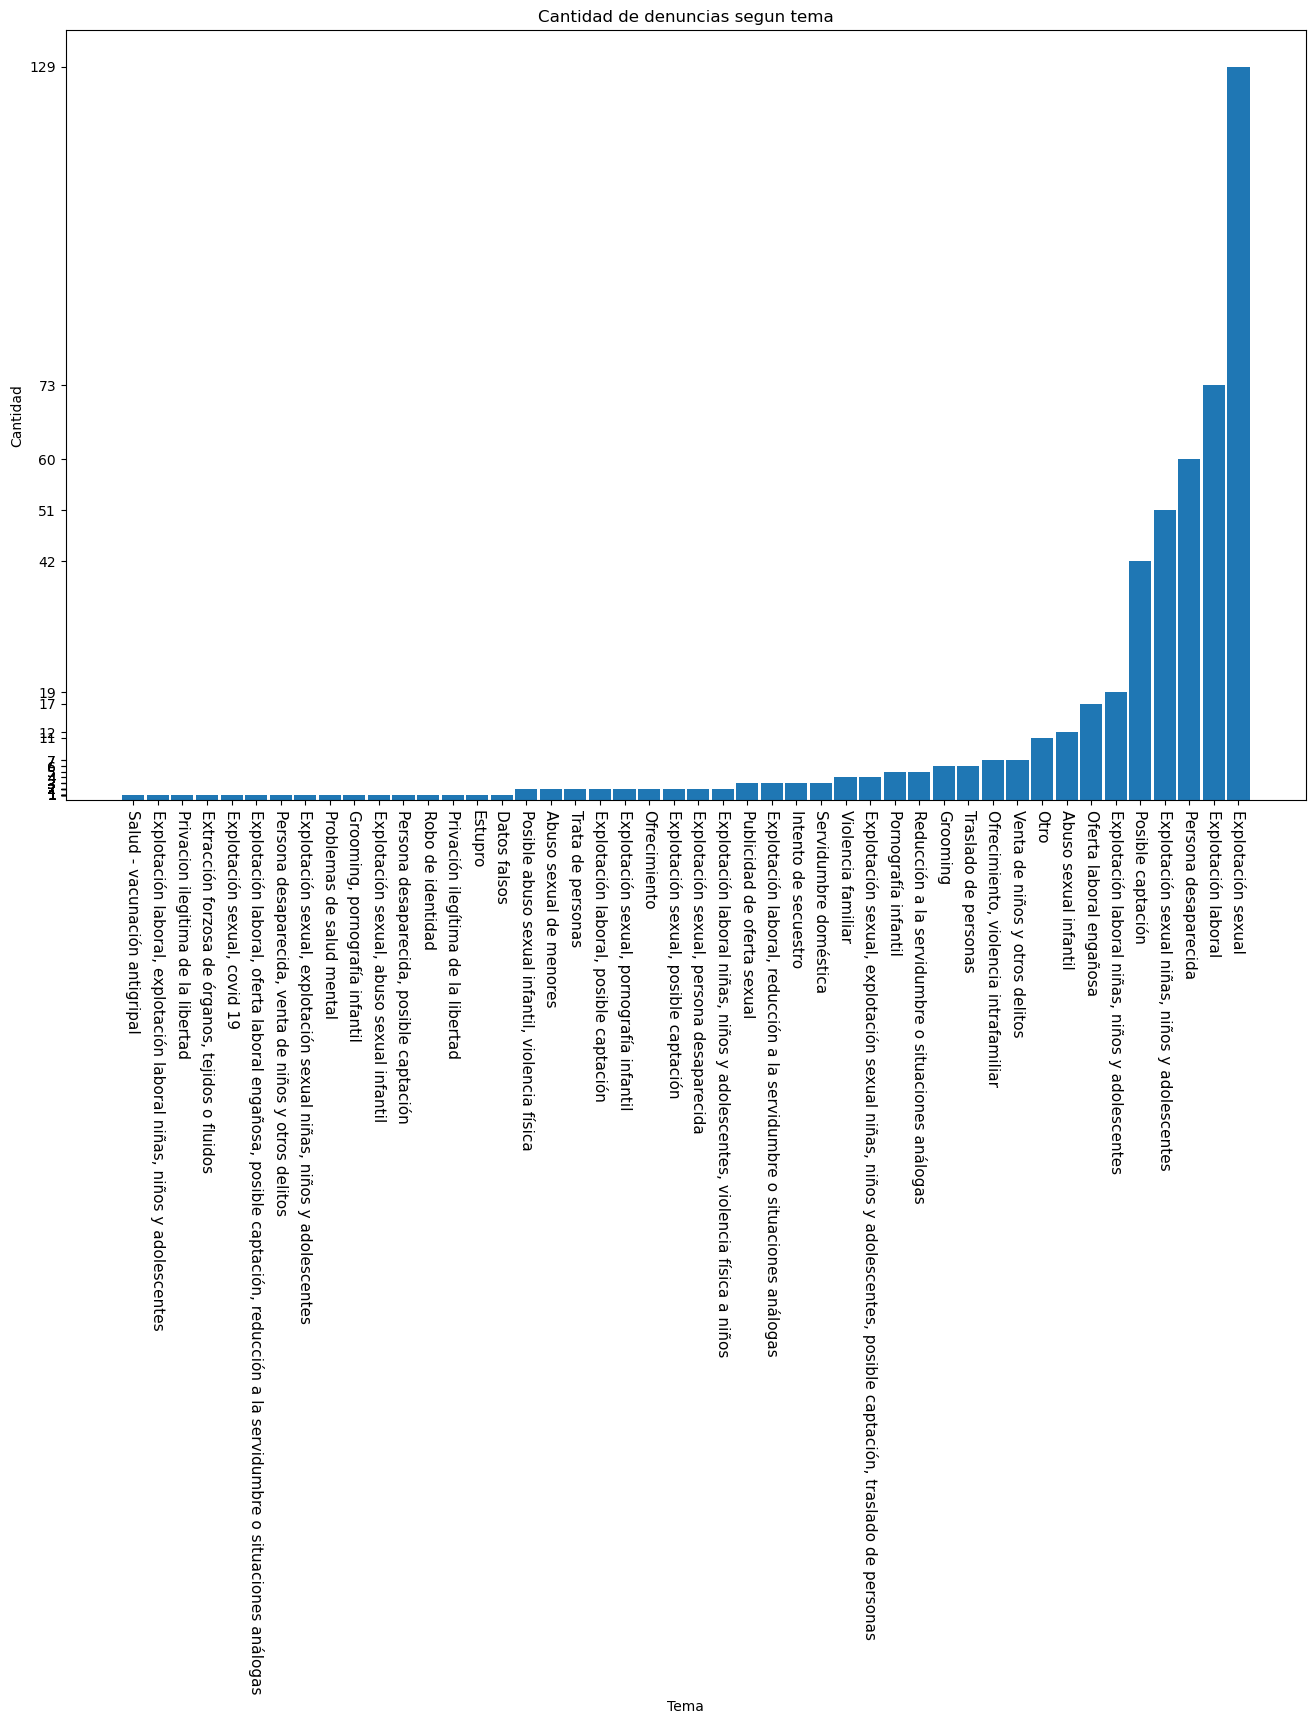

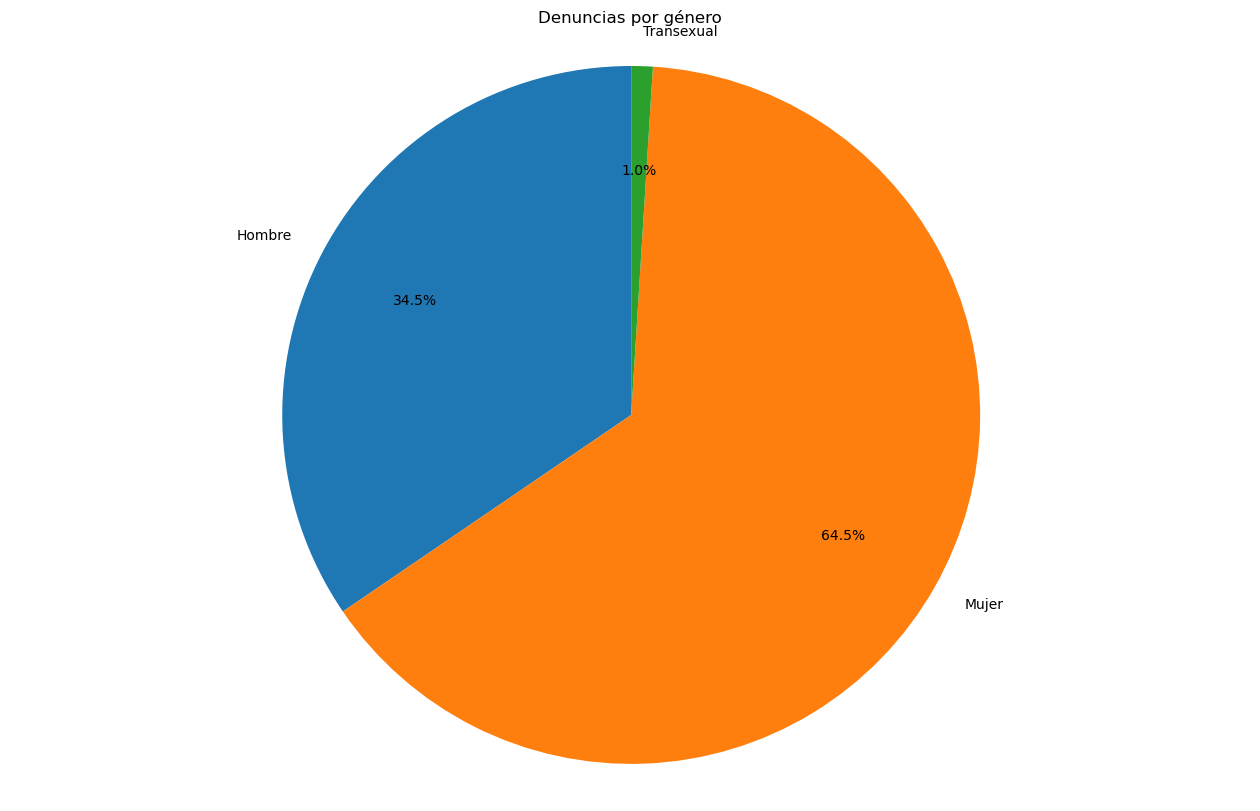

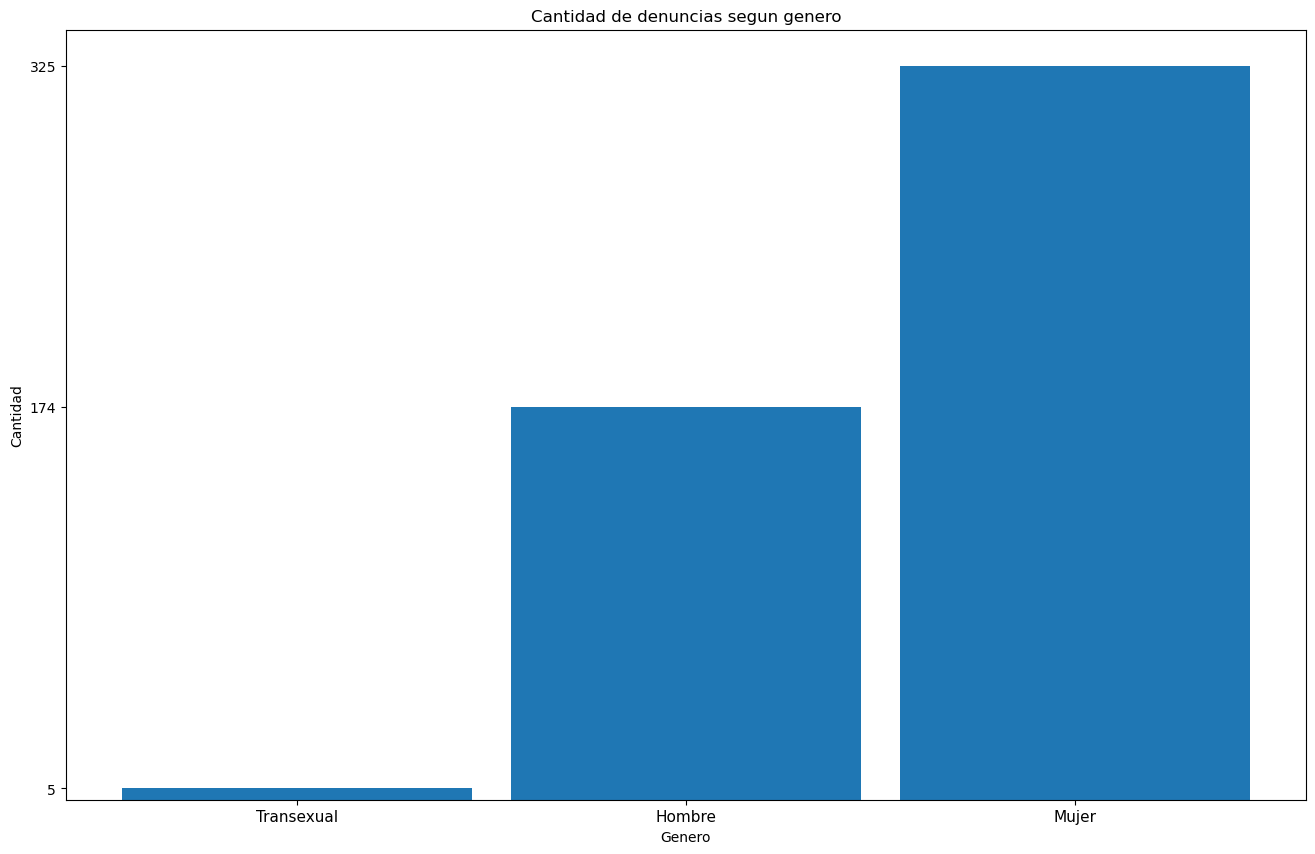

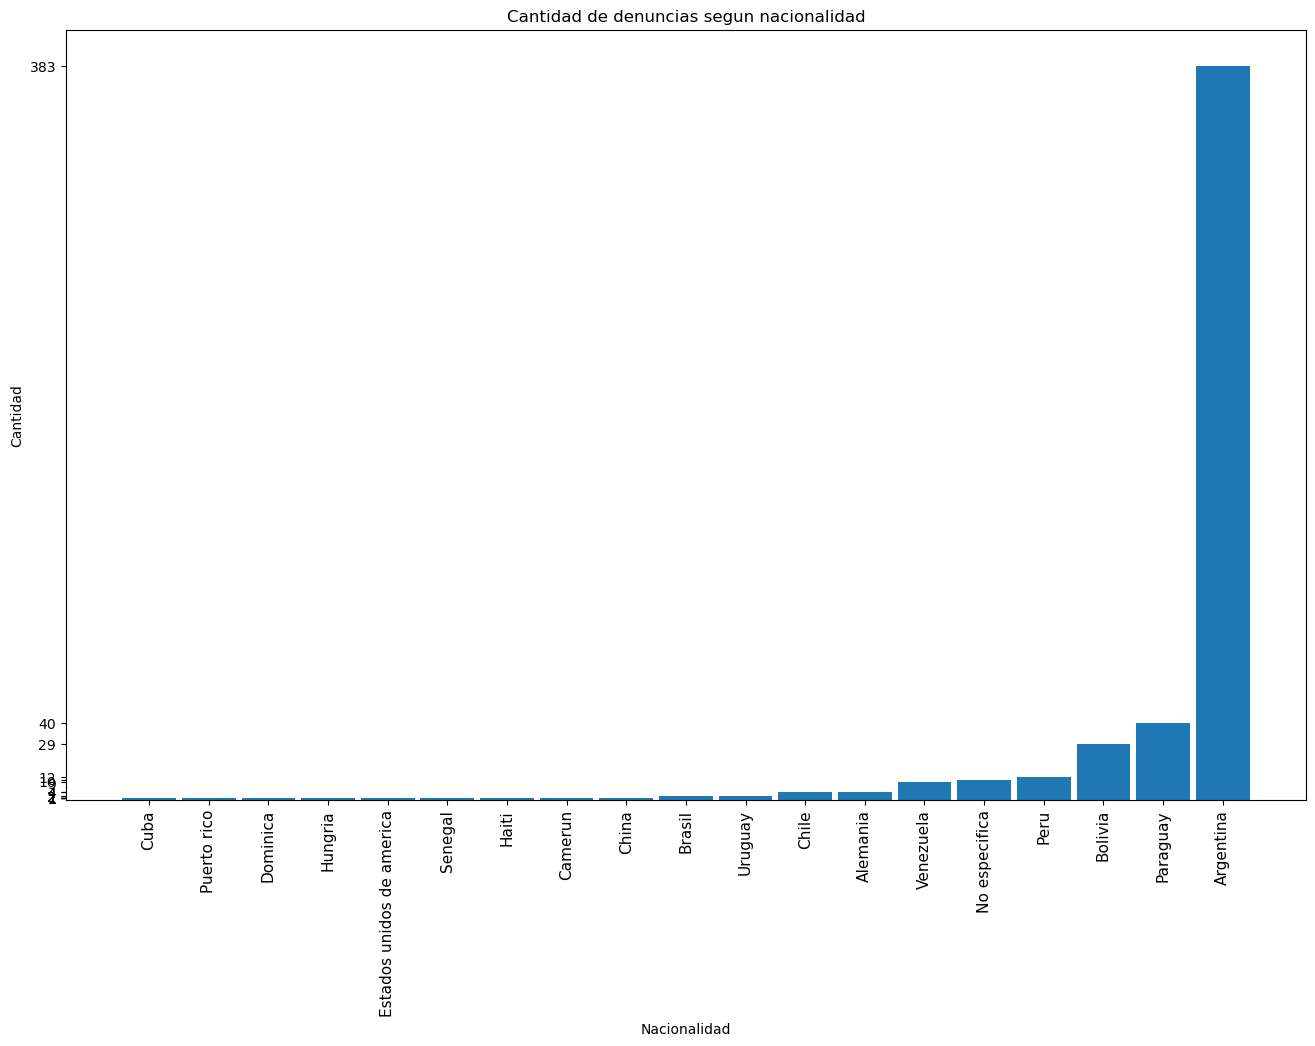

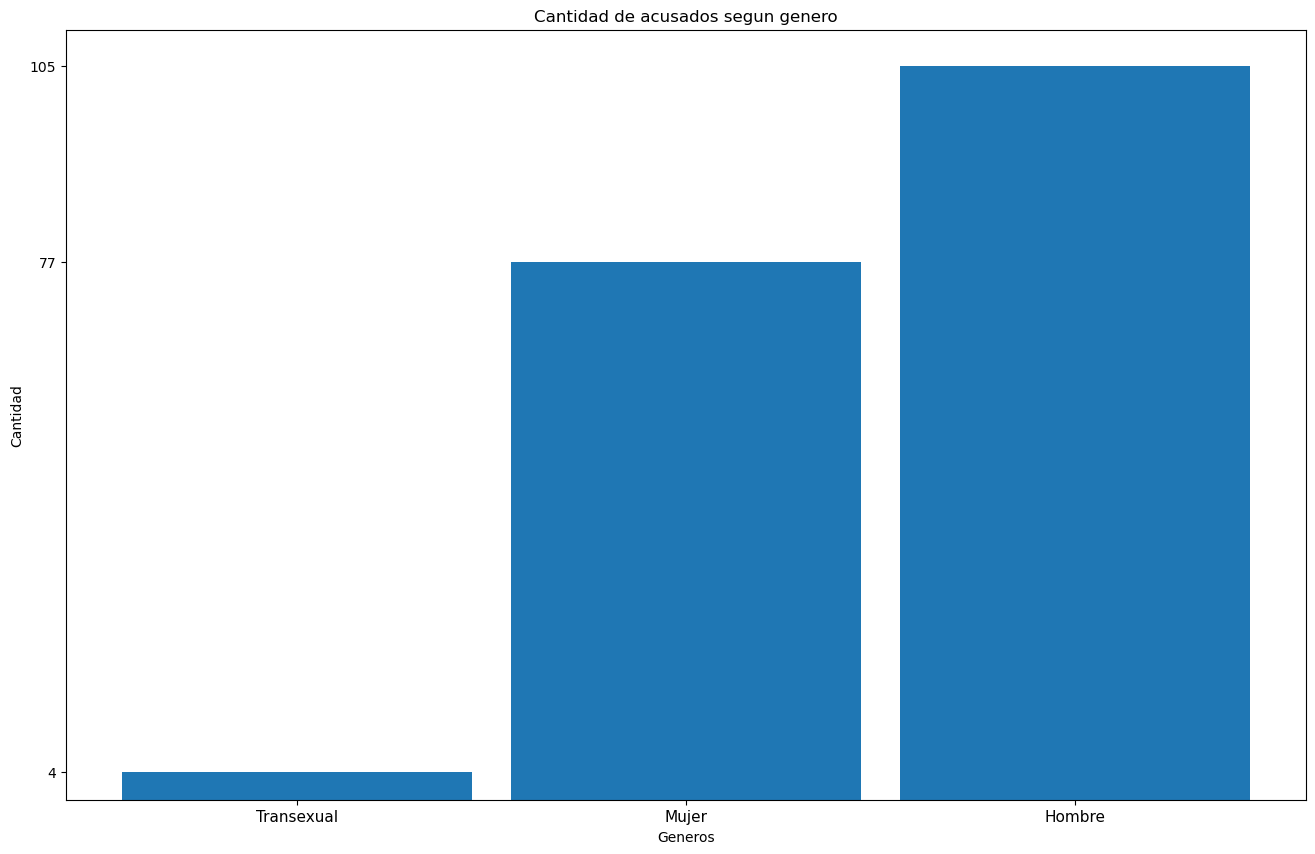

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5

def arreglarDiscapacidad(valor):
    if str(valor) == "nan":
        return "No"
    return valor

def arreglarNulos(valor):
    if str(valor) == "nan":
        return "No especifica"
    return valor

def arreglarNacionalidad(valor):
    if str(valor) == "Otro" or str(valor)== "Sin descripcion":
        return "No especifica"
    return valor

def acusadoPorGenero(valor):
    dicc = {"Hombre": 0, "Mujer": 0, "Transexual": 0} # cambiar esto para q no este hardcodeado
    # dicc = {}
    for i, v in valor["referido_tipo"].items():
        if str(valor["referido_tipo"][i]) == "Acusado":
            dicc[valor["genero"][i]] += 1
    return dicc

def arreglarNumeros(valor):
    if str(valor)!= "nan":
        return int(valor)
    return valor


data = pd.read_csv("../data/denuncias-trata.csv", sep=',', skipinitialspace=True, engine='python')
data["discapacidad"]= data["discapacidad"].apply(arreglarDiscapacidad)
data["edad_aparente"]= data["edad_aparente"].apply(arreglarNumeros).apply(arreglarNulos)
data["provincia_indec_id"]= data["provincia_indec_id"].apply(arreglarNulos)
data["provincia"] = data["provincia"].apply(arreglarNulos)
data["localidad"] = data["localidad"].apply(arreglarNulos)
data["nacionalidad"] = data["nacionalidad"].apply(arreglarNacionalidad)
data = data.dropna()
data.to_csv('../data/denuncias-trata-nuevo.csv')


# Primer grafico - Cantidad x tema

x_values = data['subtema'].value_counts().index.tolist()
y_values = data['subtema'].value_counts().tolist()
x_values= np.flip(x_values)
y_values.reverse()
plt1.figure(figsize=(16,10))
plt1.bar(x_values,y_values, width=0.9)
plt1.xticks(x_values,fontsize=11)
plt1.yticks(y_values)
plt1.title('Cantidad de denuncias segun tema')
plt1.xlabel('Tema')
plt1.ylabel('Cantidad')
plt1.xticks(rotation=270)
plt1.show()

# Segundo grafico - Proporcion por genero

labels = 'Hombre', 'Mujer',  'Transexual'
sizes = [174, 325, 5] # ver de contarlo
explode = (0, 0, 0)
fig1, ax1 = plt3.subplots(figsize=(16, 10))
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',startangle=90, pctdistance=0.7)
ax1.axis('equal')
plt2.title('Denuncias por género')
plt2.show()

# Tercer grafico - Proporcion por genero
x_values = data['genero'].value_counts().index.tolist()
y_values = data['genero'].value_counts().tolist()
x_values= np.flip(x_values)
y_values.reverse()
plt3.figure(figsize=(16,10))
plt3.bar(x_values,y_values, width=0.9)
plt3.xticks(x_values,fontsize=11)
plt3.yticks(y_values)
plt3.title('Cantidad de denuncias segun genero')
plt3.xlabel('Genero')
plt3.ylabel('Cantidad')
plt3.show()

# Cuarto grafico - Cantidad por nacionalidad

x_values = data['nacionalidad'].value_counts().index.tolist()
y_values = data['nacionalidad'].value_counts().tolist()
x_values= np.flip(x_values)
y_values.reverse()
plt4.figure(figsize=(16,10))
plt4.bar(x_values,y_values, width=0.9)
plt4.xticks(x_values,fontsize=11)
plt4.yticks(y_values)
plt4.title('Cantidad de denuncias segun nacionalidad')
plt4.xlabel('Nacionalidad')
plt4.ylabel('Cantidad')
plt4.xticks(rotation=90)
plt4.show()


# Quinto grafico - Acusados por genero
data = (acusadoPorGenero(data))
y_values = []
x_values = []
for i in data.keys():
    y_values.append(data[i])
    x_values.append(i)
x_values= np.flip(x_values)
y_values.reverse()
plt5.figure(figsize=(16,10))
plt5.bar(x_values,y_values, width=0.9)
plt5.xticks(x_values,fontsize=11)
plt5.yticks(y_values)
plt5.title('Cantidad de acusados segun genero')
plt5.xlabel('Generos')
plt5.ylabel('Cantidad')
plt5.show()
